<a href="https://colab.research.google.com/github/vemodalen/aps360_lab1/blob/master/Lab_1_PyTorch_and_ANNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1. PyTorch and ANNs

**Deadline**: Thursday, January 23, 11:59pm.

**Total**: 30 Points

**Late Penalty**: There is a penalty-free grace period of one hour past the deadline. Any work that is submitted between 1 hour and 24 hours past the deadline will receive a 20% grade deduction. No other late work is accepted. Quercus submission time will be used, not your local computer time. You can submit your labs as many times as you want before the deadline, so please submit often and early.

**Grading TA**: Kevin Course

This lab is partially based on an assignment developed by Prof. Jonathan Rose and Harris Chan.

This lab is a warm up to get you used to the PyTorch programming environment used
in the course, and also to help you review and renew your knowledge
of Python and relevant Python libraries.
The lab must be done individually. Please recall that the
University of Toronto plagarism rules apply.

By the end of this lab, you should be able to:

1. Be able to perform basic PyTorch tensor operations.
2. Be able to load data into PyTorch
3. Be able to configure an Artificial Neural Network (ANN) using PyTorch
4. Be able to train ANNs using PyTorch
5. Be able to evaluate different ANN configuations

You will need to use numpy and PyTorch documentations for this assignment:

* https://docs.scipy.org/doc/numpy/reference/
* https://pytorch.org/docs/stable/torch.html

You can also reference Python API documentations freely.


### What to submit

Submit a PDF file containing all your code, outputs, and write-up
from parts 1-5. You can produce a PDF of your Google Colab file by
going to **File > Print** and then save as PDF. The Colab instructions
has more information.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission. 

With Colab, you can export a PDF file using the menu option
`File -> Print` and save as PDF file.

## Colab Link

Submit make sure to include a link to your colab file here

Colab Link:  [https://colab.research.google.com/github/vemodalen/aps360_lab1/blob/master/Lab_1_PyTorch_and_ANNs.ipynb#scrollTo=GGtthiz1tDh5](https://colab.research.google.com/github/vemodalen/aps360_lab1/blob/master/Lab_1_PyTorch_and_ANNs.ipynb#scrollTo=GGtthiz1tDh5)

## Part 1. Python Basics [3 pt]

The purpose of this section is to get you used to the 
basics of Python, including working with functions, numbers,
lists, and strings.

Note that we **will** be checking your code for clarity and efficiency.

If you have trouble with this part of the assignment, please review http://cs231n.github.io/python-numpy-tutorial/

### Part (a) -- 1pt

Write a function `sum_of_cubes` that computes the sum of cubes up to `n`. If the input to `sum_of_cubes` invalid (e.g. negative or non-integer `n`), the function should print out `"Invalid input"` and return `-1`.

In [0]:
def sum_of_cubes(n):
    """Return the sum (1^3 + 2^3 + 3^3 + ... + n^3)
    
    Precondition: n > 0, type(n) == int
    
    >>> sum_of_cubes(3)
    36
    >>> sum_of_cubes(1)
    1
    """

    accum = 0

    if (type(n) != int) or (n < 0):
      print("Invalid Input")
      return -1

    for i in range(1, n+1):

      accum += i**3

    return accum

sum_of_cubes(-1)
sum_of_cubes(4)

Invalid Input


100

### Part (b) -- 1pt

Write a function `word_lengths` that takes a sentence (string), computes the length of each word in that sentence, and returns the length of each word in a list. You can
assume that words are always separated by a space character `" "`.

Hint: recall the `str.split` function in Python.
If you arenot sure how this function works, try
typing `help(str.split)` into a Python shell, or check out https://docs.python.org/3.6/library/stdtypes.html#str.split

In [0]:
help(str.split)

Help on method_descriptor:

split(...)
    S.split(sep=None, maxsplit=-1) -> list of strings
    
    Return a list of the words in S, using sep as the
    delimiter string.  If maxsplit is given, at most maxsplit
    splits are done. If sep is not specified or is None, any
    whitespace string is a separator and empty strings are
    removed from the result.



In [0]:
def word_lengths(sentence):
    """Return a list containing the length of each word in
    sentence.
    
    >>> word_lengths("welcome to APS360!")
    [7, 2, 7]
    >>> word_lengths("machine learning is so cool")
    [7, 8, 2, 2, 4]
    """
    words = sentence.split()
    word_length = [len(i) for i in words]

    return word_length

word_lengths("This is a test")

[4, 2, 1, 4]

### Part (c) -- 1pt

Write a function `all_same_length` that takes a sentence (string),
and checks whether every word in the string is the same length.
You should call the function `word_lengths` in the body
of this new function.


In [0]:
def all_same_length(sentence):
    """Return True if every word in sentence has the same
    length, and False otherwise.
    
    >>> all_same_length("all same length")
    False
    >>> word_lengths("hello world")
    True
    """

    word_length = word_lengths(sentence)
    if len(set(word_length)) == 1:
      return True

    else:
      return False


print(all_same_length("Test test test"))
print(all_same_length("all same length"))

True
False


## Part 2. NumPy Exercises [5 pt]

In this part of the assignment, you'll be manipulating arrays 
usign NumPy. Normally, we use the shorter name `np` to represent
the package `numpy`.

In [0]:
import numpy as np

### Part (a) -- 1pt

The below variables `matrix` and `vector` are numpy arrays. Explain what you think `<NumpyArray>.size` and `<NumpyArray>.shape` represent.

In [0]:
matrix = np.array([[1., 2., 3., 0.5],
                   [4., 5., 0., 0.],
                   [-1., -2., 1., 1.]])
vector = np.array([2., 0., 1., -2.])

In [0]:
matrix.size

12

In [0]:
matrix.shape

(3, 4)

In [0]:
vector.size

4

In [0]:
vector.shape

(4,)

**Answer:** `<NumpyArray>.size` is the number of elements in the array, `<NumpyArray>.shape` is the dimensions of the array

### Part (b) -- 1pt

Perform matrix multiplication `output = matrix x vector` by using
for loops to iterate through the columns and rows.
Do not use any builtin NumPy functions.
Cast your output into a NumPy array, if it isn't one already.

Hint: be mindful of the dimension of output

In [0]:
output = None

temp = []
for i in matrix:
  temp_1 = 0;
  for j in range(0,len(i)):
    temp_1 += vector[j]*i[j]
  temp += [temp_1]
output = np.array(temp)

In [0]:
output

array([ 4.,  8., -3.])

### Part (c) -- 1pt

Perform matrix multiplication `output2 = matrix x vector` by using
the function `numpy.dot`.

We will never actually write code as in
part(c), not only because `numpy.dot` is more concise and easier to read/write, but also performance-wise `numpy.dot` is much faster (it is written in C and highly optimized).
In general, we will avoid for loops in our code.

In [0]:
output2 = None
output2 = np.dot(matrix,vector)

In [0]:
output2

array([ 4.,  8., -3.])

### Part (d) -- 1pt

As a way to test for consistency, show that the two outputs match.

In [0]:
print(output == output2)

[ True  True  True]


### Part (e) -- 1pt

Show that using `np.dot` is faster than using your code from part (c).

You may find the below code snippit helpful:

In [0]:
import time

# record the time before running code
start_time_1 = time.time()

# place code to run here

output = None

temp = []
for i in matrix:
  temp_1 = 0;
  for j in range(0,len(i)):
    temp_1 += vector[j]*i[j]
  temp += [temp_1]
output = np.array(temp)

# record the time after the code is run
end_time_1 = time.time()

# compute the difference
diff_1 = end_time_1 - start_time_1
print("For loop: ", diff_1)

For loop:  0.0002682209014892578


In [0]:
import time

# record the time before running code
start_time_2 = time.time()

# place code to run here
output2 = None
output2 = np.dot(matrix,vector)

# record the time after the code is run
end_time_2 = time.time()

# compute the difference
diff_2 = end_time_2 - start_time_2
print("np.dot: ", diff_2)

np.dot:  8.845329284667969e-05


We can see that `np.dot` is faster than using the for loops.

## Part 3. Images [6 pt]

A picture or image can be represented as a NumPy array of “pixels”, 
with dimensions H × W × C, where H is the height of the image, W is the width of the image,
and C is the number of colour channels. Typically we will use an image with channels that give the the Red, Green, and Blue “level” of each pixel, which is referred to with the short form RGB.

You will write Python code to load an image, and perform several array manipulations to the image and visualize their effects. 

In [0]:
import matplotlib.pyplot as plt

### Part (a) -- 1 pt

This is a photograph of a dog whose name is Mochi.

![alt text](https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews)

Load the image from its url (https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews) into the variable `img` using the `plt.imread` function.

Hint: You can enter the URL directly into the `plt.imread` function as a Python string.

In [0]:
img = None
img = plt.imread("https://drive.google.com/uc?export=view&id=1oaLVR2hr1_qzpKQ47i9rVUIklwbDcews")

### Part (b) -- 1pt

Use the function `plt.imshow` to visualize `img`. 

This function will also show the coordinate system used to identify pixels.
The origin is at the top left corner, and the first dimension indicates the Y (row) direction, 
and the second dimension indicates the X (column) dimension.

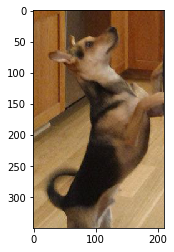

In [0]:
plt.imshow(img)

### Part (c) -- 2pt

Modify the image by adding a constant value of 0.25 to each pixel in the `img` and
store the result in the variable `img_add`. Note that, since the range for the pixels 
needs to be between [0, 1], you will also need to clip img_add to be in the range [0, 1] 
using `numpy.clip`. Clipping sets any value that is outside of the desired range to the 
closest endpoint. Display the image using `plt.imshow`.

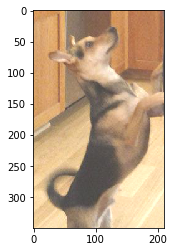

In [0]:
img_add = None
img_add = np.clip(img+0.25, 0, 1)
plt.imshow(img_add)

### Part (d) -- 2pt

Crop the **original** image (`img` variable) to a 130 x 150 image including Mochi's face. Discard the alpha colour channel (i.e. resulting `img_cropped` should **only have RGB channels**)

Display the image.

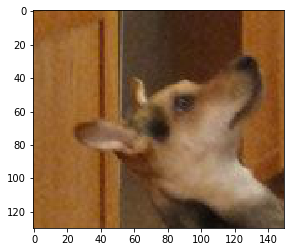

In [0]:
img_cropped = img[0:130,0:150,:3] #HxWxC[0:3]
plt.imshow(img_cropped)

## Part 4. Basics of PyTorch [6 pt]

PyTorch is a Python-based neural networks package. Along with tensorflow, PyTorch is currently one of the most popular machine learning libraries.

PyTorch, at its core, is similar to Numpy in a sense that they both 
try to make it easier to write codes for scientific computing
achieve improved performance over vanilla Python by leveraging highly optimized C back-end.
However, compare to Numpy, PyTorch offers much better GPU support and provides many high-level features for machine learning. Technically, Numpy can be used to perform almost every thing PyTorch does. However, Numpy would be a lot slower than PyTorch, especially with CUDA GPU, and it would take more effort to write machine learning related code compared to using PyTorch.

In [0]:
import torch

### Part (a) -- 1 pt

Use the function `torch.from_numpy` to convert the numpy array `img_cropped` into
a PyTorch tensor. Save the result in a variable called `img_torch`.

In [0]:
img_torch = None
img_torch = torch.from_numpy(img_cropped)

### Part (b) -- 1pt

Use the method `<Tensor>.shape` to find the shape (dimension and size) of `img_torch`.

In [0]:
img_torch.shape

torch.Size([130, 150, 3])

### Part (c) -- 1pt

How many floating-point numbers are stored in the tensor `img_torch`?

In [0]:
img_torch.numel() #total number of elements; each of which is a floating-point number

58500

### Part (d) -- 1 pt

What does the code `img_torch.transpose(0,2)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [0]:
img_torch.transpose(0,2) #splits the matrix into the three rgb channels - by swapping the dimesions 0 and 2 / transposing.
#They share storage, so img_torch is updated : https://pytorch.org/docs/stable/torch.html#torch.transpose

tensor([[[0.5882, 0.5412, 0.6157,  ..., 0.6039, 0.5882, 0.5804],
         [0.5765, 0.5647, 0.6196,  ..., 0.6078, 0.6078, 0.6039],
         [0.5569, 0.5961, 0.6196,  ..., 0.6118, 0.6196, 0.6235],
         ...,
         [0.5804, 0.5882, 0.5922,  ..., 0.3804, 0.3882, 0.4196],
         [0.6039, 0.6078, 0.6157,  ..., 0.3765, 0.3804, 0.4039],
         [0.6157, 0.6196, 0.6275,  ..., 0.3765, 0.3804, 0.3961]],

        [[0.3725, 0.3216, 0.3765,  ..., 0.3882, 0.3725, 0.3647],
         [0.3608, 0.3451, 0.3843,  ..., 0.3922, 0.3922, 0.3882],
         [0.3412, 0.3765, 0.3843,  ..., 0.3961, 0.4039, 0.4078],
         ...,
         [0.3412, 0.3490, 0.3529,  ..., 0.3098, 0.3176, 0.3373],
         [0.3647, 0.3686, 0.3765,  ..., 0.3059, 0.3098, 0.3216],
         [0.3765, 0.3804, 0.3882,  ..., 0.3098, 0.3098, 0.3137]],

        [[0.1490, 0.0902, 0.1529,  ..., 0.1686, 0.1529, 0.1451],
         [0.1373, 0.1137, 0.1490,  ..., 0.1686, 0.1725, 0.1686],
         [0.1176, 0.1451, 0.1412,  ..., 0.1725, 0.1804, 0.

### Part (e) -- 1 pt

What does the code `img_torch.unsqueeze(0)` do? What does the expression return? 
Is the original variable `img_torch` updated? Explain.

In [0]:
img_torch.unsqueeze(0) #Reverses the effects of transpose - Returns a new tensor 
#with a dimension of size one inserted at the specified position.
#The returned tensor shares the same underlying data with this tensor. : https://pytorch.org/docs/stable/torch.html#torch.unsqueeze


tensor([[[[0.5882, 0.3725, 0.1490],
          [0.5765, 0.3608, 0.1373],
          [0.5569, 0.3412, 0.1176],
          ...,
          [0.5804, 0.3412, 0.1294],
          [0.6039, 0.3647, 0.1529],
          [0.6157, 0.3765, 0.1647]],

         [[0.5412, 0.3216, 0.0902],
          [0.5647, 0.3451, 0.1137],
          [0.5961, 0.3765, 0.1451],
          ...,
          [0.5882, 0.3490, 0.1373],
          [0.6078, 0.3686, 0.1569],
          [0.6196, 0.3804, 0.1686]],

         [[0.6157, 0.3765, 0.1529],
          [0.6196, 0.3843, 0.1490],
          [0.6196, 0.3843, 0.1412],
          ...,
          [0.5922, 0.3529, 0.1373],
          [0.6157, 0.3765, 0.1608],
          [0.6275, 0.3882, 0.1725]],

         ...,

         [[0.6039, 0.3882, 0.1686],
          [0.6078, 0.3922, 0.1686],
          [0.6118, 0.3961, 0.1725],
          ...,
          [0.3804, 0.3098, 0.2157],
          [0.3765, 0.3059, 0.2118],
          [0.3765, 0.3098, 0.2078]],

         [[0.5882, 0.3725, 0.1529],
          [0.6078

### Part (f) -- 1 pt

Find the maximum value of `img_torch` along each colour channel? Your output should be a one-dimensional
PyTorch tensor with exactly three values.

Hint: lookup the function `torch.max`.

In [0]:
torch.max(torch.max(img_torch.transpose(0,2),1)[0],1)[0]

tensor([0.8941, 0.7882, 0.6745])

## Part 5. Training an ANN [10 pt]

The sample code provided below is a 2-layer ANN trained on the MNIST dataset to identify digits less than 3 or greater than and equal to 3. Modify the code by changing any of the following and observe how the accuracy and error are affected:

- number of training iterations
- number of hidden units
- numbers of layers
- types of activation functions
- learning rate



In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 1)

    def forward(self, img):
        flattened = img.view(-1, 28 * 28) # single column vector
        activation1 = self.layer1(flattened) # first layer
        activation1 = F.relu(activation1) # relu
        #activation1 = F.tanh(activation1) # tanh
        #activation1 = F.sigmoid(activation1) # sigmoid
        activation2 = self.layer2(activation1) # second layer
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))

Training Error Rate: 0.036
Training Accuracy: 0.964
Test Error Rate: 0.079
Test Accuracy: 0.921


### Part (a) -- 3 pt
Comment on which of the above changes resulted in the best accuracy on training data? What accuracy were you able to achieve?

In [26]:
# Number of training iterations: peaks at 1.0 at Epoch 4, stays there after that
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

epochs = 20
for epoch in range(epochs):
  for (image, label) in mnist_train:
      # actual ground truth: is the digit less than 3?
      actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
      # pigeon prediction
      out = pigeon(img_to_tensor(image)) # step 1-2
      # update the parameters based on the loss
      loss = criterion(out, actual)      # step 3
      loss.backward()                    # step 4 (compute the updates for each parameter)
      optimizer.step()                   # step 4 (make the updates for each parameter)
      optimizer.zero_grad()              # a clean up step for PyTorch

  # computing the error and accuracy on the training set
  error = 0
  for (image, label) in mnist_train:
      prob = torch.sigmoid(pigeon(img_to_tensor(image)))
      if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
          error += 1
  print("Epoch: ", epoch, "Training Error Rate:", error/len(mnist_train), "Training Accuracy:", 1 - error/len(mnist_train))

Epoch:  0 Training Error Rate: 0.017 Training Accuracy: 0.983
Epoch:  1 Training Error Rate: 0.013 Training Accuracy: 0.987
Epoch:  2 Training Error Rate: 0.009 Training Accuracy: 0.991
Epoch:  3 Training Error Rate: 0.004 Training Accuracy: 0.996
Epoch:  4 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  5 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  6 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  7 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  8 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  9 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  10 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  11 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  12 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  13 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  14 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  15 Training Error Rate: 0.0 Training Accuracy: 1.0
Epoch:  16 Training Error Rate: 0.0 Training Accur

In [36]:
# Number of hidden units: Maximum is around 0.987 for 10000 units. We get 0.985 for 3000 units

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
import matplotlib.pyplot as plt # for plotting
import torch.optim as optim

torch.manual_seed(1) # set the random seed

# define a 2-layer artificial neural network
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 10000)
        self.layer2 = nn.Linear(10000, 1)

    def forward(self, img):
        flattened = img.view(-1, 28 * 28) # single column vector
        activation1 = self.layer1(flattened) # first layer
        activation1 = F.relu(activation1) # relu
        #activation1 = F.tanh(activation1) # tanh
        #activation1 = F.sigmoid(activation1) # sigmoid
        activation2 = self.layer2(activation1) # second layer
        return activation2

pigeon = Pigeon()

# load the data
mnist_data = datasets.MNIST('data', train=True, download=True)
mnist_data = list(mnist_data)
mnist_train = mnist_data[:1000]
mnist_val   = mnist_data[1000:2000]
img_to_tensor = transforms.ToTensor()
      
    
# simplified training code to train `pigeon` on the "small digit recognition" task
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.SGD(pigeon.parameters(), lr=0.005, momentum=0.9)

for (image, label) in mnist_train:
    # actual ground truth: is the digit less than 3?
    actual = torch.tensor(label < 3).reshape([1,1]).type(torch.FloatTensor)
    # pigeon prediction
    out = pigeon(img_to_tensor(image)) # step 1-2
    # update the parameters based on the loss
    loss = criterion(out, actual)      # step 3
    loss.backward()                    # step 4 (compute the updates for each parameter)
    optimizer.step()                   # step 4 (make the updates for each parameter)
    optimizer.zero_grad()              # a clean up step for PyTorch

# computing the error and accuracy on the training set
error = 0
for (image, label) in mnist_train:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Training Error Rate:", error/len(mnist_train))
print("Training Accuracy:", 1 - error/len(mnist_train))


# computing the error and accuracy on a test set
error = 0
for (image, label) in mnist_val:
    prob = torch.sigmoid(pigeon(img_to_tensor(image)))
    if (prob < 0.5 and label < 3) or (prob >= 0.5 and label >= 3):
        error += 1
print("Test Error Rate:", error/len(mnist_val))
print("Test Accuracy:", 1 - error/len(mnist_val))


Training Error Rate: 0.013
Training Accuracy: 0.987
Test Error Rate: 0.056
Test Accuracy: 0.944


In [0]:
# Number of layers: Add a layer - accuracy is around 0.95 for different splits. Maximum accuracy was for 784 -> 30 -> 5 -> 1 as shown below
'''
class Pigeon(nn.Module):
    def __init__(self):
        super(Pigeon, self).__init__()
        self.layer1 = nn.Linear(28 * 28, 30)
        self.layer2 = nn.Linear(30, 5)
        self.layer3 = nn.Linear(5,1)

    def forward(self, img):
        flattened = img.view(-1, 28 * 28) # single column vector
        activation1 = self.layer1(flattened) # first layer
        activation1 = F.relu(activation1) # relu
        activation2 = self.layer2(activation1) # second layer
        activation2 = F.relu(activation2)
        activation3 = self.layer3(activation2)
        return activation3
'''
# Type of Activation Function : maximum for ReLu : 0.964 (Sigmoid has 0.927 and Tanh has 0.96)
# Learning Rate : maximized at lr = 0.0046 ; accuracy = 0.968  (decreases as we move away)

### Part (b) -- 3 pt


Comment on which of the above changes resulted in the best accuracy on testing data? What accuracy were you able to achieve?

### Part (c) -- 4 pt
Which model hyperparameters should you use, the ones from (a) or (b)?